In [7]:
import sys
sys.path.insert(0,'/home/noah/Desktop/large_analysis/ca_analysis/')
import numpy as np
from scipy.signal import fftconvolve
from matplotlib.pyplot import *
import fileread as fr
import predefined as pd
import wave_ops as wo
from scipy.optimize import curve_fit

def wave(x,*pars):
    '''a,t0,tau = pars'''
    a,t0,tau = pars
    out=np.zeros(x.shape[-1])
    out[x>t0]=a*np.exp(-(x[x>t0]-t0)/float(tau))
    return out
fs=35

bd,ch=4,3
data= fr.raw('/home/noah/Desktop/large_analysis/ca_analysis/Run_131_0.bin',length=3500,row=1000,numwaves=100000)
wo.baseline_restore(data,600)
data=data[pd.land(data['board']==4,data['channel']==3)]
t=np.arange(3500)

6.0


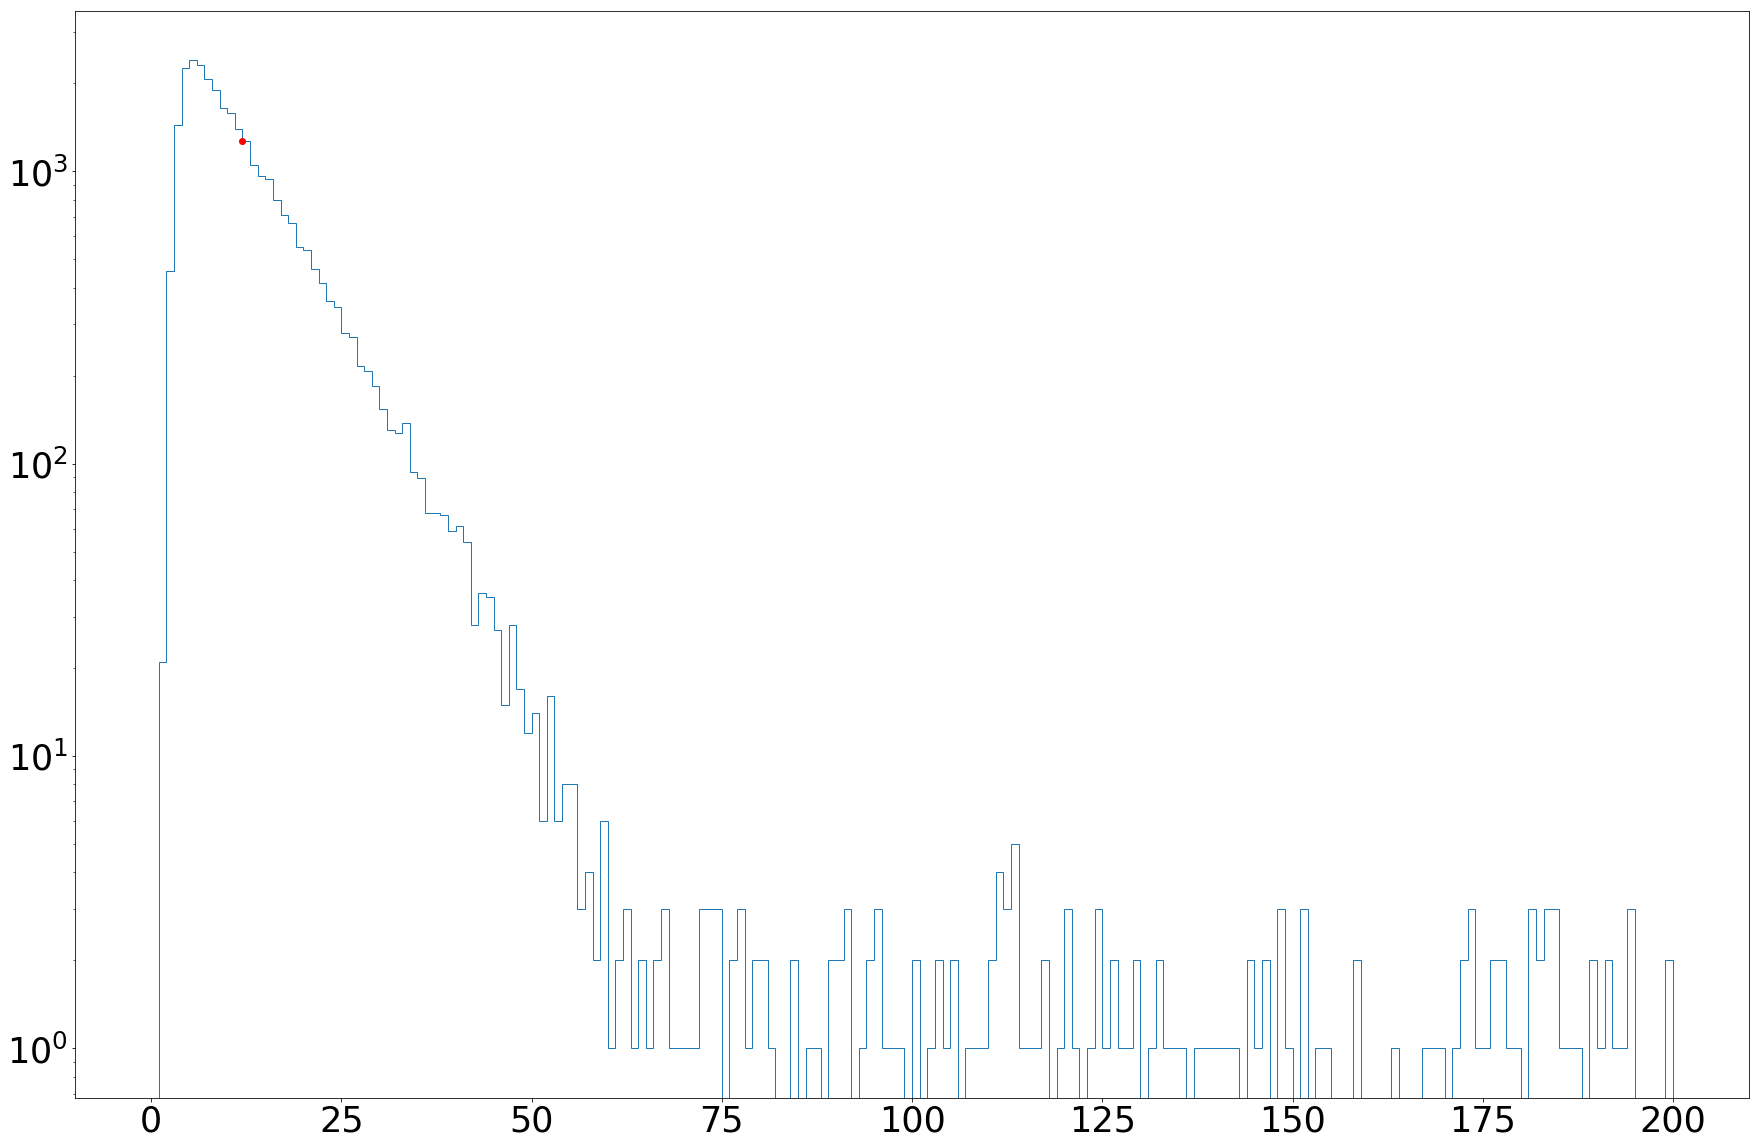

In [51]:
sigs=[]
for i in range(len(data)):
    rise,top,fall=400,70,1050
    trp=np.zeros(3500)
    d=data['wave'][i] #+ wave(t,200,1000+870,1050)
    #d=wave(t,10,1000,1050)+wave(t,10,1000+delt,1050)
    wo.trap(trp,fall=fall,rise=rise,top=top)
    dtrap=fftconvolve(trp,d,mode='full')[0:3500]/float(rise*fall)
    sigs.append(np.sqrt(np.sum(dtrap[0:100]**2.)))
figure(figsize=(30,20))
h,b,pal=hist(sigs,bins=200,range=[0,200],histtype='step')
plot(b[12],h[12],'ro')
print(b[np.argmax(h)+1])
yscale('log')
tick_params(labelsize=fs)
show()

18 1227


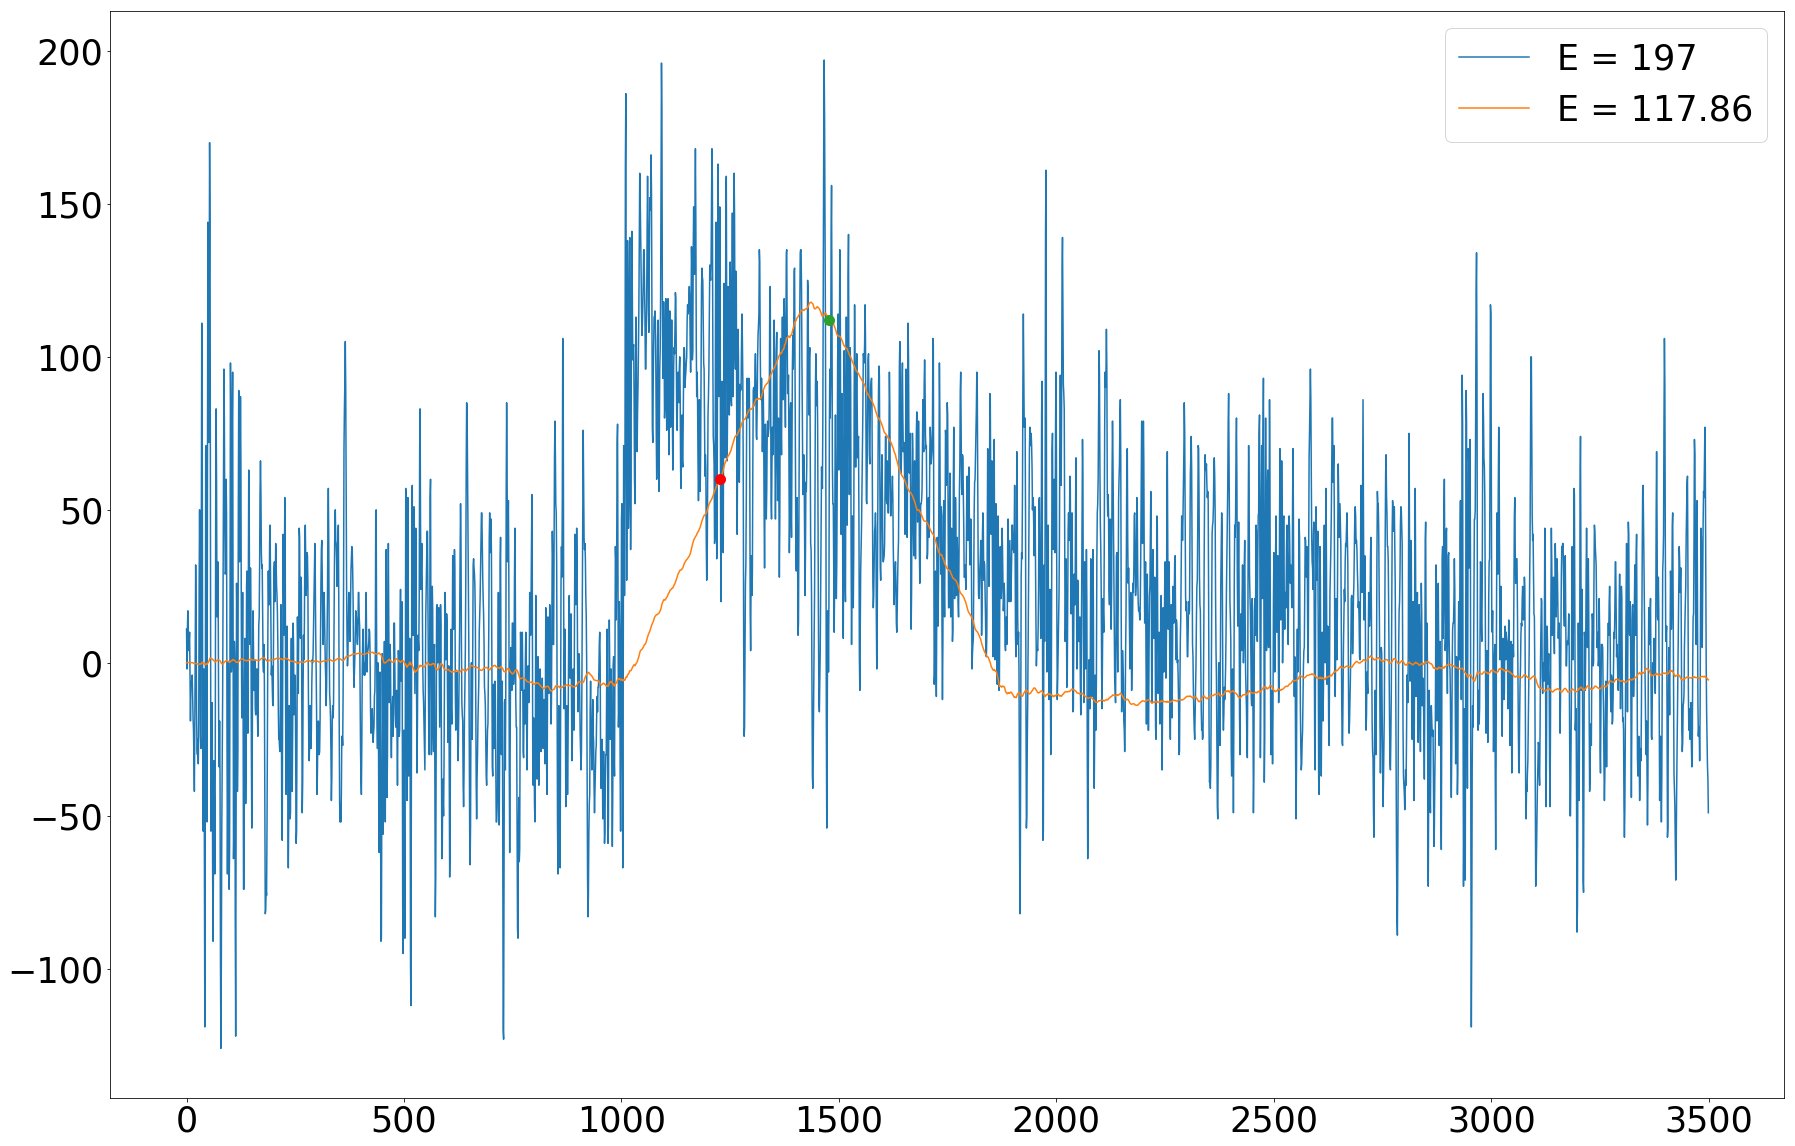

In [177]:
t=np.arange(3500,dtype='f8')
for i in range(len(data)):
    rise,top,fall=400,70,1050
    trp=np.zeros(3500)
    d=data['wave'][i] #+ wave(t,200,1000+870,1050)
    #d=wave(t,10,1000,1050)+wave(t,10,1000+delt,1050)
    wo.trap(trp,fall=fall,rise=rise,top=top)
    dtrap=fftconvolve(trp,d,mode='full')[0:3500]/float(rise*fall)
    if i>17 and max(dtrap)<200: #and max(dtrap)<100:#100<max(dtrap)<150 and i>0:
        sig=np.sqrt(np.sum(dtrap[0:100]**2.))
        for j in range(len(gtrap)-140):
            count=np.sum(dtrap[j:j+140]>60)
            if count==140:
                break
            
        loc=j
        if loc < 3429:
            print(i,loc)

            fig,ax1=subplots(figsize=(30,20))
            ax1.plot(t,d,label='E = {:1.0f}'.format(max(d)))
            ax1.plot(t,dtrap,label='E = {:0.2f}'.format(max(dtrap)))
            ax1.plot(t[loc],dtrap[loc],'ro',ms=10)
            ax1.plot(t[loc+250],dtrap[loc+250],'C2o',ms=10)
            ax1.tick_params(labelsize=fs)
            ax1.legend(fontsize=fs)
            show()
            break

241


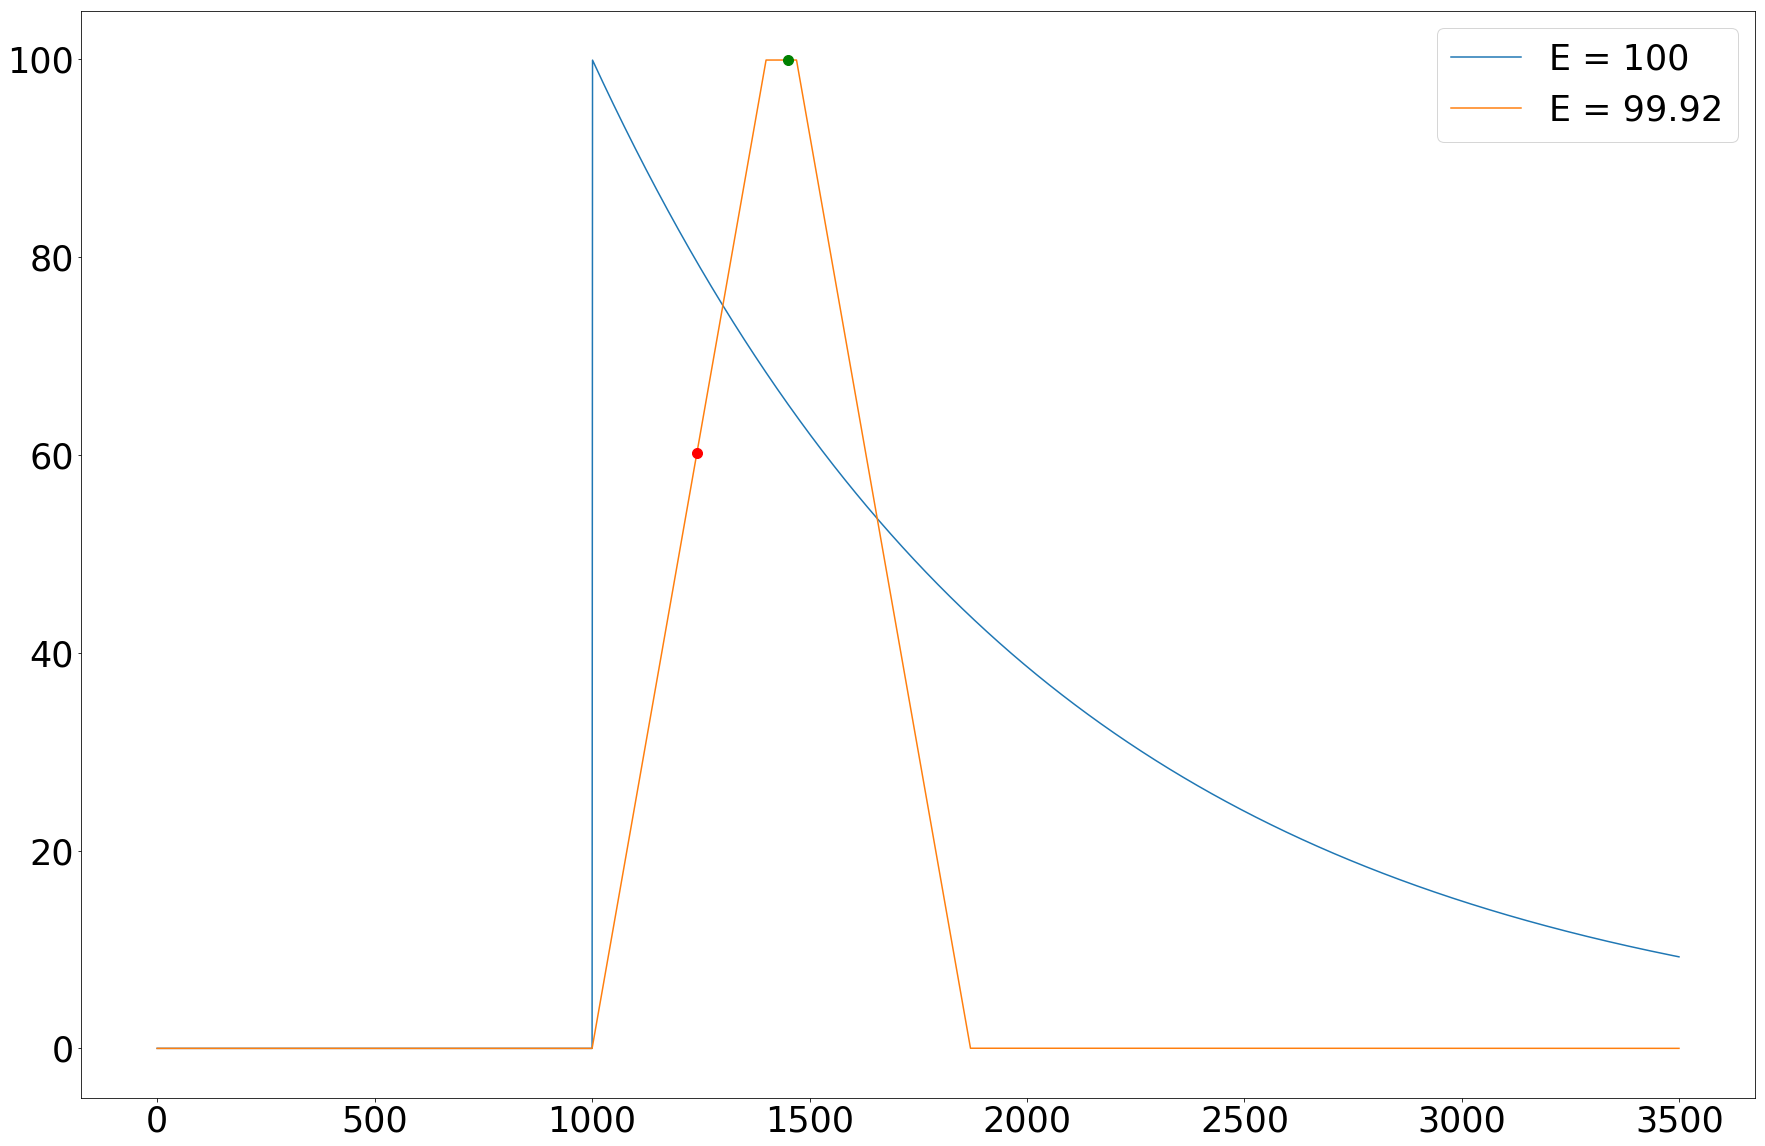

In [92]:

trp=np.zeros(3500)
t0,delt=1000,300
d=data['wave'][i] #+ wave(t,200,1000+870,1050)
d=wave(t,100,t0,1050)+wave(t,0,t0+delt,1050)
wo.trap(trp,fall=fall,rise=rise,top=top)
dtrap=fftconvolve(trp,d,mode='full')[0:3500]/float(rise*fall)

for j in range(len(dtrap)-140):
    count=np.sum(dtrap[j:j+140]>60)
    if count==140:
        break
loc=j
print(loc-t0)
        
fig,ax1=subplots(figsize=(30,20))
ax1.plot(t,d,label='E = {:1.0f}'.format(max(d)))
ax1.plot(t,dtrap,label='E = {:0.2f}'.format(max(dtrap)))
ax1.plot(t[loc],dtrap[loc],'ro',ms=10)
ax1.plot(t[t0+rise+top-20],dtrap[t0+rise+top-20],'go',ms=10)
ax1.tick_params(labelsize=fs)
ax1.legend(fontsize=fs)
show()

[3.825      3.01042986 2.43900651 2.00797557 1.690519  ]


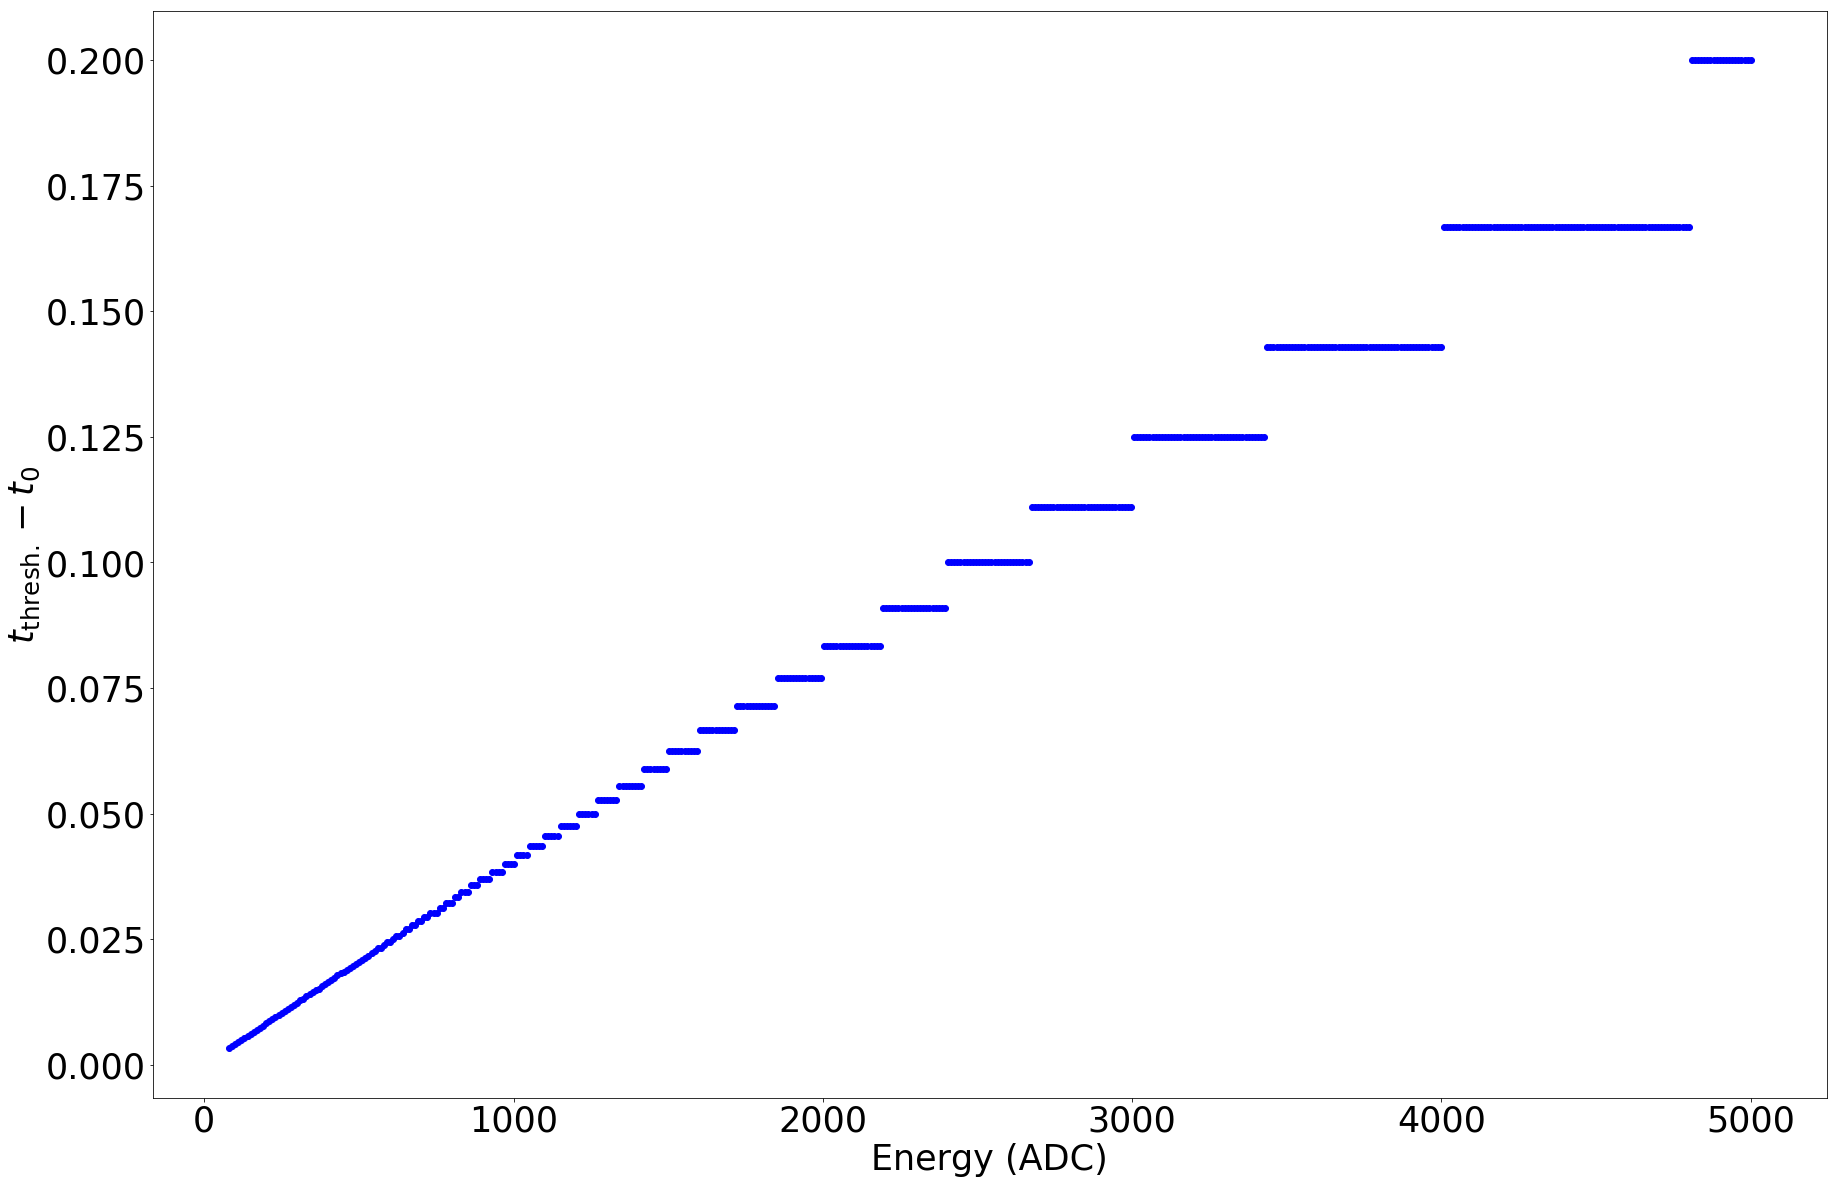

In [208]:
rise,top,fall=400,70,1200
t0=1000
x,y=[],[]
f= lambda t,a,b: a+b/t
for amp in np.linspace(80,5000,492):
    d=wave(t,amp,t0,1050)
    wo.trap(trp,fall=fall,rise=rise,top=top)
    dtrap=fftconvolve(trp,d,mode='full')[0:3500]/float(rise*fall)

    for j in range(len(dtrap)-140):
        count=np.sum(dtrap[j:j+140]>60)
        if count==140:
            break
    loc=j-t0
    x.append(amp)
    y.append(loc)
x,y=np.array(x,dtype='float'),np.array(y,dtype='float')
figure(figsize=(30,20))
plot(x,1/y,'bo')
#plot(x,f(x,150,300,100,0))
xlabel('1/Energy (ADC)',fontsize=fs)
ylabel(r'$t_\mathrm{thresh.}-t_0$',fontsize=fs)
tick_params(labelsize=fs)
print((y/x)[0:5])
show()

3.61433626e-01, 2.42920647e+04


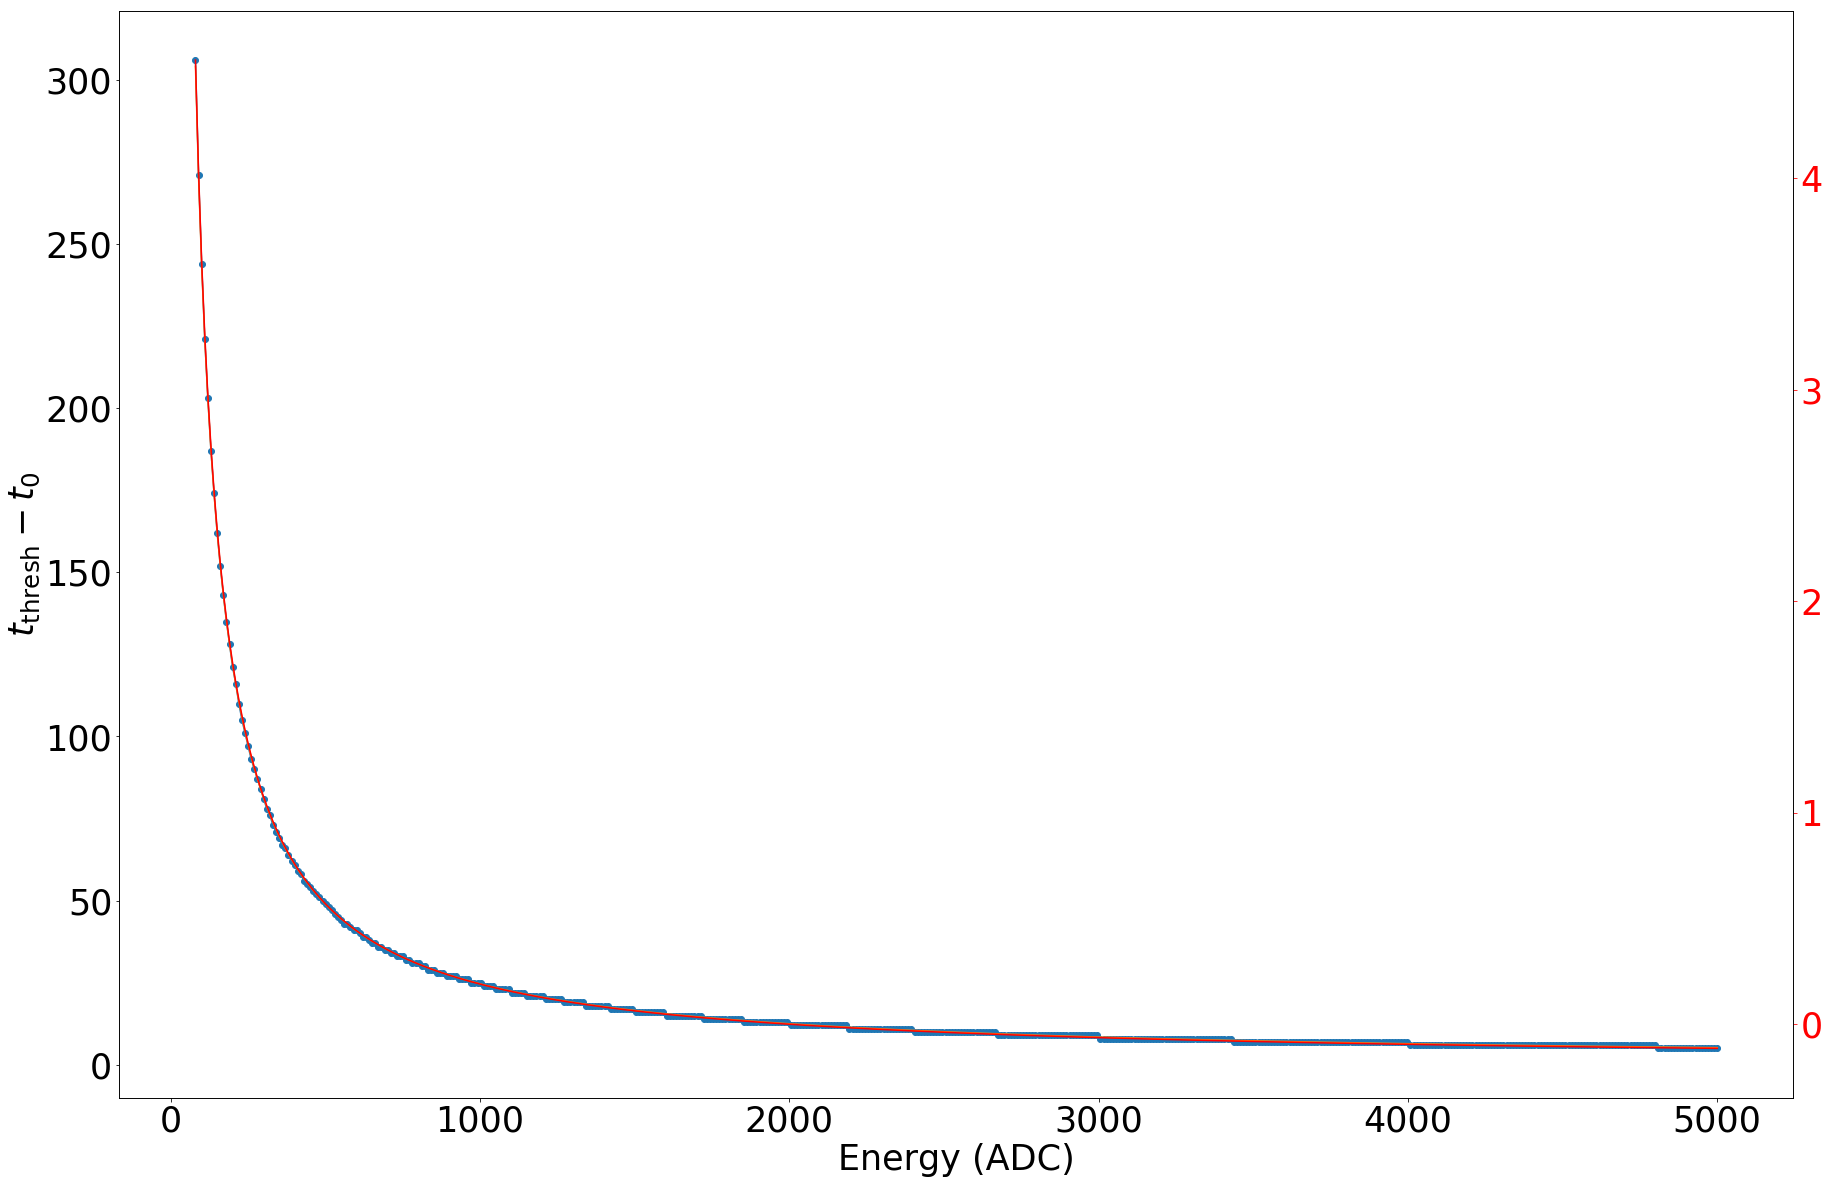

In [209]:
pars,vrs=curve_fit(f,x,y,p0=[0,3],maxfev=int(1e5))
print('{0:0.8e}, {1:0.8e}'.format(*pars))
figure(figsize=(30,20))
plot(x,y,color='C0',marker='o',ls=None)
plot(x,f(x,pars[0],pars[1]),color='C1')
xlabel('Energy (ADC)',fontsize=fs)
ylabel(r'$t_\mathrm{thresh}-t_0$',fontsize=fs)
tick_params(labelsize=fs)
twinx()
plot(x,(f(x,*pars)-f(x,5.50965676e-01, 2.39121354e+04)),color='r')
#plot(x,f(x,-1526.43,1975.9247,12.1354,-6.4101),'')

tick_params(axis='y',colors='r',labelsize=fs)
show()

In [231]:
data= fr.raw('/home/noah/Desktop/large_analysis/ca_analysis/Run_131_0.bin',length=3500,row=1000,numwaves=100000)
wo.baseline_restore(data,600)
data=data.view(np.recarray)

In [233]:
rises=np.zeros(len(data),dtype=[('bdch',int),('wavmax',int),('traploc',int)])
rises=rises.view(np.recarray)
t=np.arange(3500,dtype='f8')
rise,top,fall=100,10,1050
trp=np.zeros(3500)
for i in range(len(data)):
    d=data['wave'][i] #+ wave(t,200,1000+870,1050)
    wo.trap(trp,fall=fall,rise=rise,top=top)
    dtrap=fftconvolve(trp,d,mode='full')[0:3500]/float(rise*fall)
    trpmx=np.argmax(dtrap)-100
    mx=np.argmax(data.wave[i])
    rises.bdch[i]=data.board[i]*8+data.channel[i]
    rises.wavmax[i]=mx
    rises.traploc[i]=trpmx

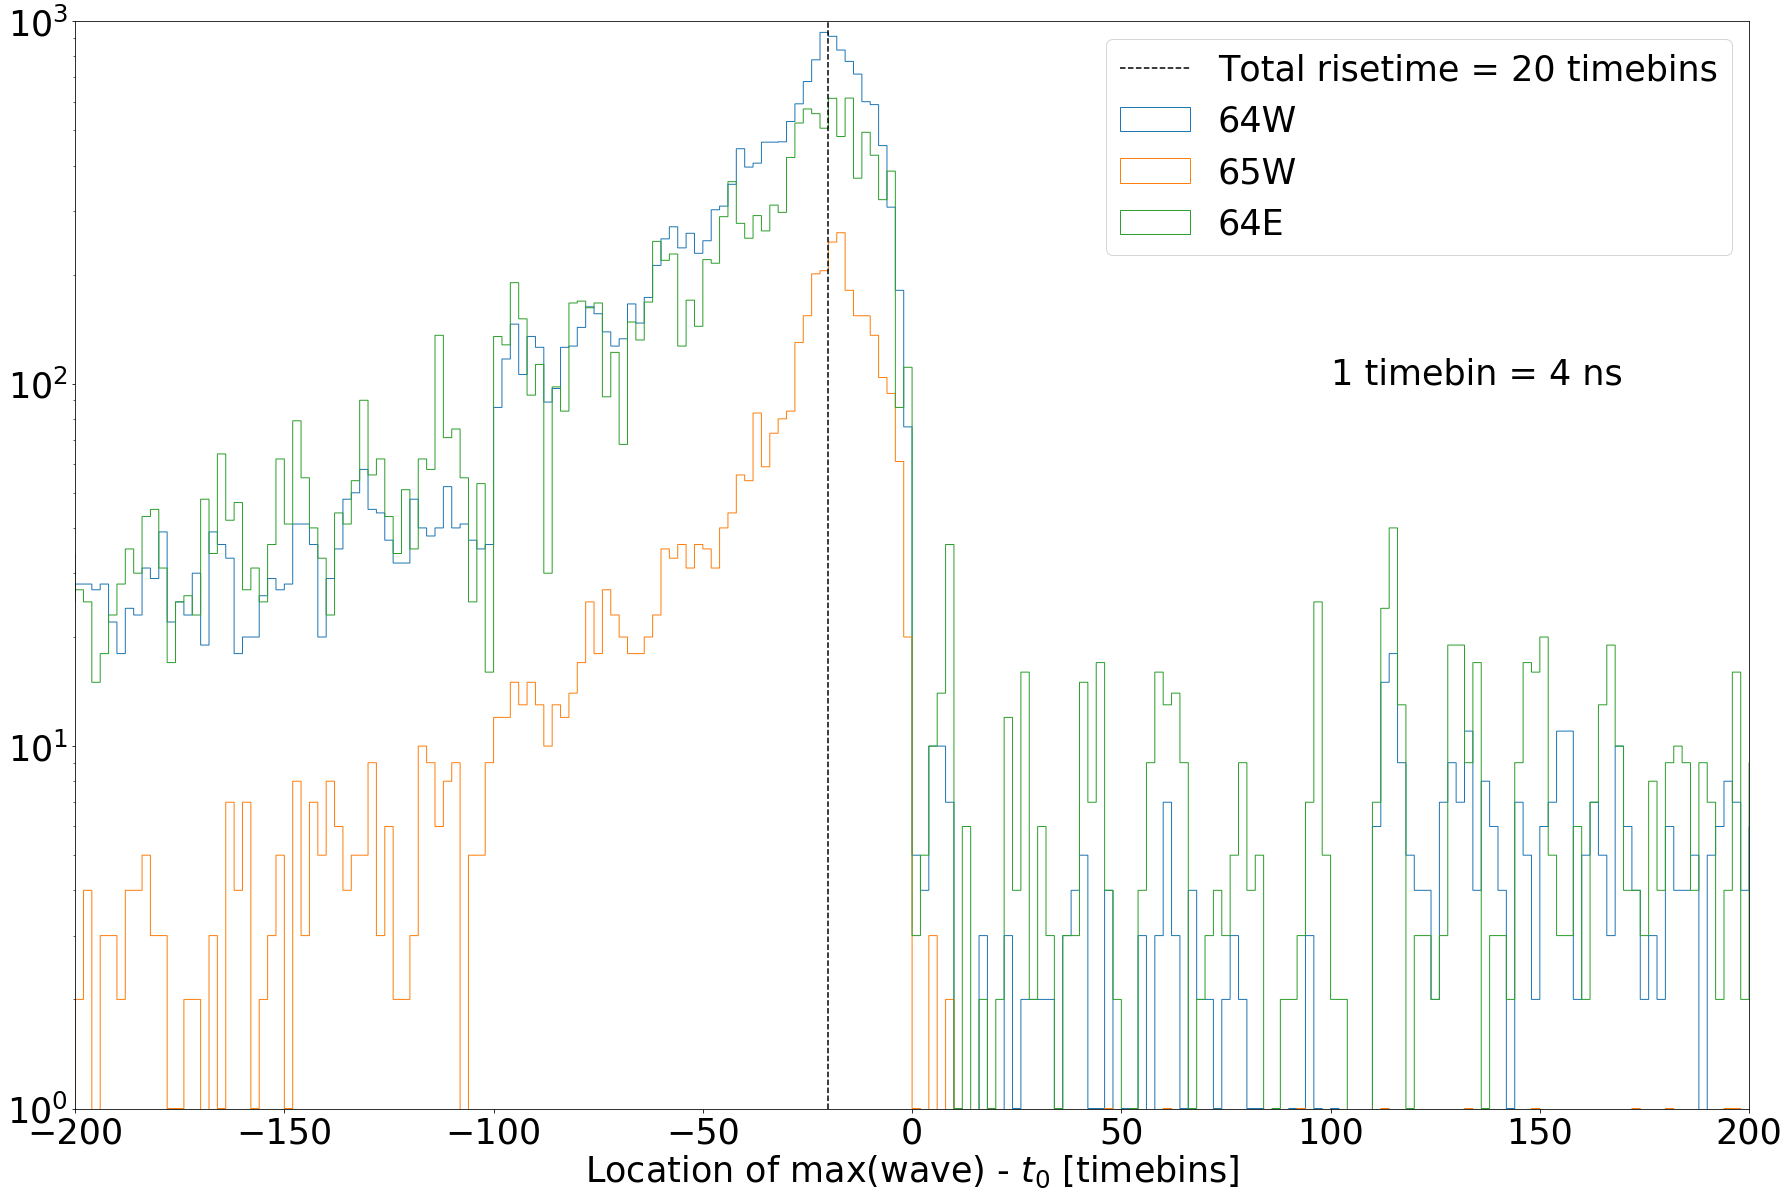

In [253]:
fig,ax1=subplots(figsize=(30,20))
for bdch in (11,12,35):
    bd,ch=int(bdch/8),int(bdch%8)
    trutharray=rises.bdch==bdch


    ax1.hist((rises.traploc-rises.wavmax)[trutharray],bins=3500,range=[-3500,3500],\
             histtype='step',label=pd.pixel(bd,ch))
x=-20
ax1.plot((x,x),(1,1e4),'k--',label='Total risetime = {:0.0f} timebins'.format(-x))
ax1.tick_params(labelsize=fs)
ax1.legend(fontsize=fs)
ax1.set_yscale('log')
ax1.set_xlim(-200,200)
ax1.set_ylim(1,1e3)
ax1.text(x=100,y=100,s='1 timebin = 4 ns',fontsize=fs)
ax1.set_xlabel(r'Location of max(wave) - $t_0$ [timebins]',fontsize=fs)
show()

In [ ]:
rise,top,fall=100,1,1050
data= fr.raw('/home/noah/Desktop/large_analysis/ca_analysis/Run_131_0.bin',length=3500,row=1000,numwaves=100000)
wo.baseline_restore(data,600)
t0=1000
x,y=[],[]
f= lambda t,a,b: a+b/t
for amp in np.linspace(80,5000,492):
    d=wave(t,amp,t0,1050)
    wo.trap(trp,fall=fall,rise=rise,top=top)
    dtrap=fftconvolve(trp,d,mode='full')[0:3500]/float(rise*fall)

    for j in range(len(dtrap)-140):
        count=np.sum(dtrap[j:j+140]>60)
        if count==140:
            break
    loc=j-t0
    x.append(amp)
    y.append(loc)
x,y=np.array(x,dtype='float'),np.array(y,dtype='float')
figure(figsize=(30,20))
plot(x,1/y,'bo')
#plot(x,f(x,150,300,100,0))
xlabel('1/Energy (ADC)',fontsize=fs)
ylabel(r'$t_\mathrm{thresh.}-t_0$',fontsize=fs)
tick_params(labelsize=fs)
print((y/x)[0:5])
show()